In [1]:
 !pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 29kB/s 
     |████████████████████████████████| 3.8MB 54.6MB/s 
     |████████████████████████████████| 450kB 57.4MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [4]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

2.1.0
True


344064/337723 [==============================] - 0s 0us/step


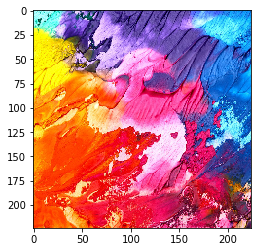

In [5]:
import matplotlib.pyplot as plt
import cv2

style_path = tf.keras.utils.get_file('style.jpg', 'http://bit.ly/2mGfZIq')

style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0
plt.imshow(style_image)

tf.Tensor([0.49030316 0.00639462 0.947634  ], shape=(3,), dtype=float32)


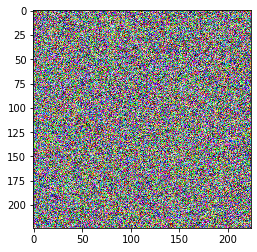

In [6]:
target_image = tf.random.uniform(style_image.shape)
print(target_image[0,0,:])
plt.imshow(target_image)

In [7]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

vgg = VGG19(include_top=False, weights='imagenet')

vgg.summary()

80142336/80134624 [==============================] - 2s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [0]:
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in style_layers]

In [9]:
outputs

[<tf.Tensor 'block1_conv1/Identity:0' shape=(None, None, None, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Identity:0' shape=(None, None, None, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Identity:0' shape=(None, None, None, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Identity:0' shape=(None, None, None, 512) dtype=float32>,
 <tf.Tensor 'block5_conv1/Identity:0' shape=(None, None, None, 512) dtype=float32>]

In [10]:
vgg.input

<tf.Tensor 'input_1:0' shape=(None, None, None, 3) dtype=float32>

In [11]:
model = tf.keras.Model([vgg.input], outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [12]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
def gram_matrix(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

In [14]:
tf.cast(5,tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [0]:
style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0

style_batch = style_image.astype('float32')
style_batch = tf.expand_dims(style_batch, axis=0)
style_output = model(preprocess_input(style_batch * 255.0))

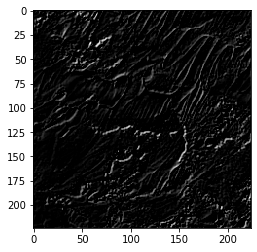

In [16]:
plt.imshow(tf.squeeze(style_output[0][:,:,:,0], 0), cmap='gray')

In [0]:
import numpy as np

In [18]:
np.shape(style_output)

(5, 1)

In [19]:
style_output[0].shape

TensorShape([1, 224, 224, 64])

In [20]:
style_output[0][:,:,:,0]

<tf.Tensor: shape=(1, 224, 224), dtype=float32, numpy=
array([[[  0.       ,   0.       ,   0.       , ...,   0.       ,
           4.1184382,  49.158417 ],
        [  0.       ,   0.       ,  18.723621 , ...,   0.       ,
          91.854744 ,  79.75761  ],
        [  0.       ,   0.       ,  46.98082  , ...,  55.258713 ,
          77.99335  ,   0.       ],
        ...,
        [ 44.295143 ,  40.39553  ,  31.611086 , ..., 102.56673  ,
           0.       ,   0.       ],
        [  9.1085615,   0.       ,   0.       , ...,  49.33187  ,
           0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]]], dtype=float32)>

In [21]:
tf.squeeze(style_output[0][:,:,:,0],0)

<tf.Tensor: shape=(224, 224), dtype=float32, numpy=
array([[  0.       ,   0.       ,   0.       , ...,   0.       ,
          4.1184382,  49.158417 ],
       [  0.       ,   0.       ,  18.723621 , ...,   0.       ,
         91.854744 ,  79.75761  ],
       [  0.       ,   0.       ,  46.98082  , ...,  55.258713 ,
         77.99335  ,   0.       ],
       ...,
       [ 44.295143 ,  40.39553  ,  31.611086 , ..., 102.56673  ,
          0.       ,   0.       ],
       [  9.1085615,   0.       ,   0.       , ...,  49.33187  ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)>

In [0]:
def get_outputs(image):
    image_batch = tf.expand_dims(image, axis=0)
    output = model(preprocess_input(image_batch * 255.0))
    outputs = [gram_matrix(out) for out in output]
    return outputs
  
def get_loss(outputs, style_outputs):
    return tf.reduce_sum([tf.reduce_mean((o-s)**2) for o,s in zip(outputs, style_outputs)])
  
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [0]:
style_outputs = [gram_matrix(out) for out in style_output]

opt = tf.optimizers.Adam(learning_rate=0.2, beta_1=0.99, epsilon=1e-1)

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        loss = get_loss(outputs, style_outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

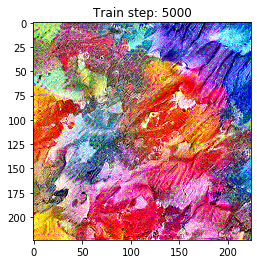

Total time: 139.2


In [24]:
import IPython.display as display
import time
import imageio

start = time.time()

image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [0]:
def high_pass_x_y(image):
    x_var = image[:,1:,:] - image[:,:-1,:]
    y_var = image[1:,:,:] - image[:-1,:,:]
    return x_var, y_var

def total_variation_loss(image):
    x_deltas, y_deltas = high_pass_x_y(image)
    return tf.reduce_mean(x_deltas**2) + tf.reduce_mean(y_deltas**2)

In [0]:
total_variation_weight = 1e9
style_weight = 1e-1

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        loss = style_weight * get_loss(outputs, style_outputs)
        loss += total_variation_weight * total_variation_loss(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

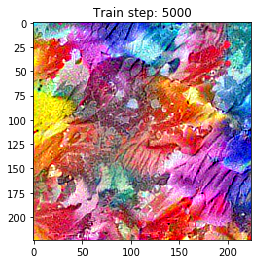

Total time: 140.0


In [31]:
start = time.time()

target_image = tf.random.uniform(style_image.shape)
image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_variation_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [39]:
ls

1.jpg                                             style_epoch_40.png
2.jpg                                             style_epoch_45.png
3.jpg                                             style_epoch_49.png
sample_data/                                      style_epoch_5.png
style_0.01_content_10000.0_transfer_epoch_0.png   style_variation_epoch_0.png
style_0.01_content_10000.0_transfer_epoch_10.png  style_variation_epoch_10.png
style_0.01_content_10000.0_transfer_epoch_15.png  style_variation_epoch_15.png
style_0.01_content_10000.0_transfer_epoch_19.png  style_variation_epoch_20.png
style_0.01_content_10000.0_transfer_epoch_5.png   style_variation_epoch_25.png
style_epoch_0.png                                 style_variation_epoch_30.png
style_epoch_10.png                                style_variation_epoch_35.png
style_epoch_15.png                                style_variation_epoch_40.png
style_epoch_20.png                                style_variation_epoch_45.png
style_epoch_25.

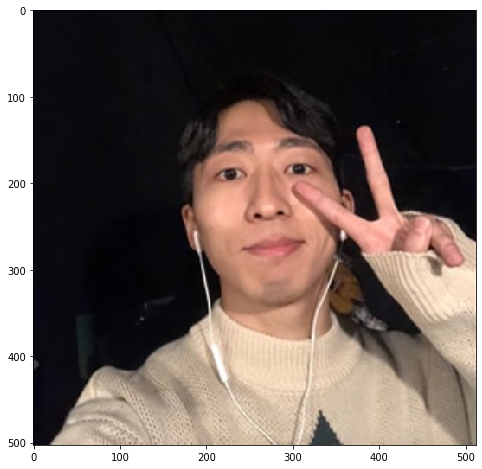

In [52]:
import matplotlib.pyplot as plt
import cv2

content_path = tf.keras.utils.get_file('content.jpg', 'http://bit.ly/2mAfUX1')

content_image = plt.imread('jn.jpg')
max_dim = 512
long_dim = max(content_image.shape[:-1])
scale = max_dim / long_dim
new_height = int(content_image.shape[0] * scale)
new_width = int(content_image.shape[1] * scale)

content_image = cv2.resize(content_image, dsize=(new_width, new_height))
content_image = content_image / 255.0
plt.figure(figsize=(8,8))
plt.imshow(content_image)

In [0]:
content_batch = content_image.astype('float32')
content_batch = tf.expand_dims(content_batch, axis=0)

content_layers = ['block5_conv2']

vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in content_layers]
model_content = tf.keras.Model([vgg.input], outputs)
content_output = model_content(preprocess_input(content_batch * 255.0))

In [0]:
def get_content_output(image):
    image_batch = tf.expand_dims(image, axis=0)
    output = model_content(preprocess_input(image_batch * 255.0))
    return output

def get_content_loss(image, content_output):
    return tf.reduce_sum(tf.reduce_mean(image-content_output)**2)

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.99, epsilon=1e-1)

total_variation_weight = 1e9
style_weight = 1e-2
content_weight = 1e4

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        output2 = get_content_output(image)
        loss = style_weight * get_loss(outputs, style_outputs)
        loss += content_weight * get_content_loss(output2, content_output)
        loss += total_variation_weight * total_variation_loss(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

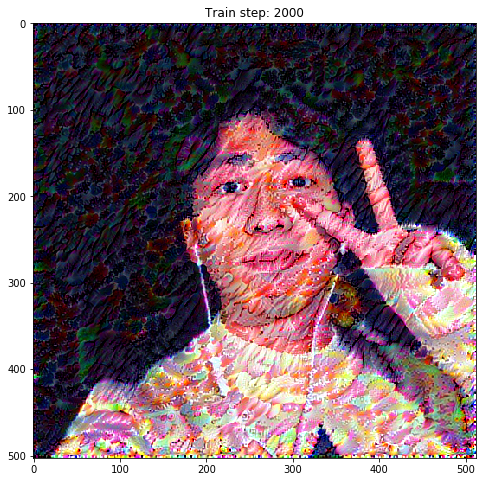

Total time: 386.3


In [56]:
start = time.time()

# target_image = tf.random.uniform(content_image.shape)
image = tf.Variable(content_image.astype('float32'))

epochs = 20
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='')
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_{0}_content_{1}_transfer_epoch_{2}.png'.format(style_weight, content_weight, n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.figure(figsize=(8,8))
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))